In [2]:
import pandas as pd 
import numpy as np 
import numpy.linalg as npl 
import matplotlib.pyplot as plt 

data3 = pd.read_csv("input/data3_shenge.csv")
print(data3)
plt.rcParams['font.sans-serif'] = ['KaiTi']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


    gesture  forces  sg1  sg2  sg3  sg4  sg5  sg6
0         1     100   45   34  -43  -42    2   -7
1         1     500  232  192 -200 -214   18  -24
2         1    1000  470  385 -406 -426   35  -44
3         2     100   44   35  -40  -39    0   -4
4         2     500  226  183 -196 -201   10  -14
5         2    1000  462  355 -381 -392   23  -30
6         3     100   42   32  -39  -38   -2   -4
7         3     500  218  178 -185 -190    6   -2
8         3    1000  431  349 -362 -385    8   -8
9         4     100   41   34  -36  -37    0   -2
10        4     500  203  169 -177 -187    4   -3
11        4    1000  418  338 -350 -370    7   -7
12        5     100   39   30  -35  -35    0   -1
13        5     500  198  163 -173 -179    3   -3
14        5    1000  398  323 -335 -351    6   -5
15        6     100   38   30  -34  -32    6    6
16        6     500  192  154 -166 -166    2   -2
17        6    1000  390  312 -328 -338    4   -5
18        7     100   38   28  -33  -31    0   -1


In [3]:
def l_gesture(data, g, sg, forces, has_bias = False):
    gdata = data[data['gesture'] == g]
    y = np.matrix(gdata[sg]).T
    if has_bias:
        w_forces = forces.shape[0]
        print(forces.reshape([1, w_forces]))
        print(np.ones([1, w_forces]))
        X = np.matrix(np.vstack([forces.reshape([1, w_forces]), np.ones([1, w_forces])])).T 
        ans = npl.inv(X.T * X) * X.T * y * 1e-6
    else:
        X = np.matrix(forces).T
        ans = 1 / (X.T * X) * X.T * y * 1e-6
    # print(X, y)
    return ans


forces' shape: (3,)
   gesture  forces  sg1  sg2  sg3  sg4  sg5  sg6
0        1     100   45   34  -43  -42    2   -7
1        1     500  232  192 -200 -214   18  -24
2        1    1000  470  385 -406 -426   35  -44


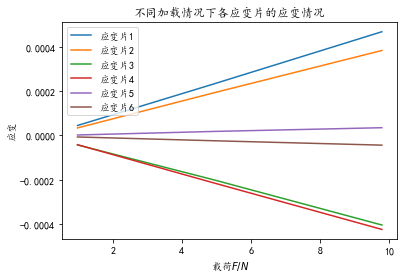

   gesture  forces  sg1  sg2  sg3  sg4  sg5  sg6
3        2     100   44   35  -40  -39    0   -4
4        2     500  226  183 -196 -201   10  -14
5        2    1000  462  355 -381 -392   23  -30


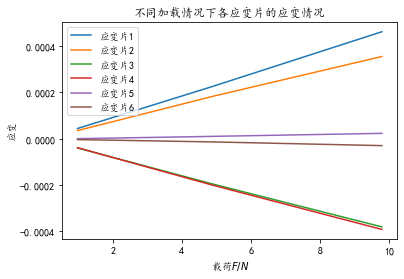

   gesture  forces  sg1  sg2  sg3  sg4  sg5  sg6
6        3     100   42   32  -39  -38   -2   -4
7        3     500  218  178 -185 -190    6   -2
8        3    1000  431  349 -362 -385    8   -8


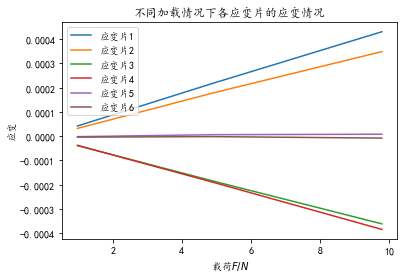

    gesture  forces  sg1  sg2  sg3  sg4  sg5  sg6
9         4     100   41   34  -36  -37    0   -2
10        4     500  203  169 -177 -187    4   -3
11        4    1000  418  338 -350 -370    7   -7


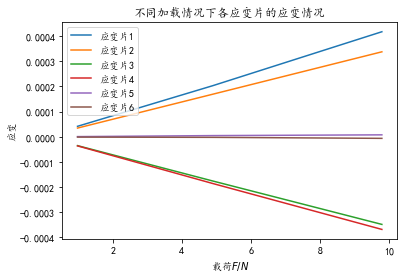

    gesture  forces  sg1  sg2  sg3  sg4  sg5  sg6
12        5     100   39   30  -35  -35    0   -1
13        5     500  198  163 -173 -179    3   -3
14        5    1000  398  323 -335 -351    6   -5


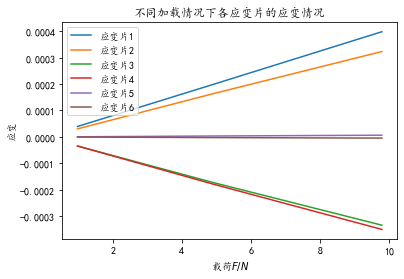

    gesture  forces  sg1  sg2  sg3  sg4  sg5  sg6
15        6     100   38   30  -34  -32    6    6
16        6     500  192  154 -166 -166    2   -2
17        6    1000  390  312 -328 -338    4   -5


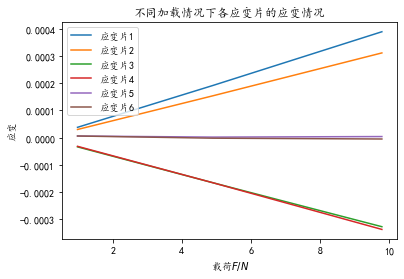

    gesture  forces  sg1  sg2  sg3  sg4  sg5  sg6
18        7     100   38   28  -33  -31    0   -1
19        7     500  184  152 -160 -166    2   -3
20        7    1000  380  309 -318 -333    6   -6


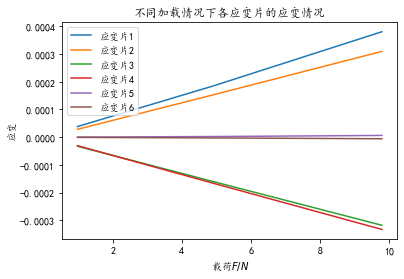

In [8]:
gestures = np.array([1, 2, 3, 4, 5, 6, 7])
forces = np.array([100, 500, 1000])
print("forces' shape:", forces.shape)
sgs = np.array(['sg1', 'sg2', 'sg3', 'sg4', 'sg5', 'sg6'])
## visualize a gesture
def v_gesture(data, gesture, sgs, forces):
    ## data of this gesture
    gdata = data[data['gesture'] == gesture]
    print(gdata)
    for sg in sgs:
        plt.plot(forces * 9.8 / 1000, [i * 1e-6 for i in gdata[sg]])
        # weight = l_gesture(data, g, sg, forces)
        # print(weight)
        # plt_forces = np.arange(50, 1001)
        # plt.plot(plt_forces, [(np.matrix([[f, 1]]) * weight)[0, 0] for f in plt_forces])
    str_legend = [str_sg.replace('sg', '应变片') for str_sg in sgs]
    plt.legend(str_legend)

for g in gestures:
    v_gesture(data3, g, sgs, forces)
    plt.title("不同加载情况下各应变片的应变情况")
    plt.xlabel(r"载荷$F/N$")
    plt.ylabel(r"应变")
    plt.show()

7 6
[[ 4.68650794e-07  4.59841270e-07  4.31904762e-07  4.15555556e-07
   3.97539683e-07  3.88730159e-07  3.77619048e-07]
 [ 3.84444444e-07  3.57142857e-07  3.50158730e-07  3.38015873e-07
   3.23412698e-07  3.11111111e-07  3.07777778e-07]
 [-4.05000000e-07 -3.83333333e-07 -3.63809524e-07 -3.50873016e-07
  -3.37301587e-07 -3.28888889e-07 -3.18492063e-07]
 [-4.26349206e-07 -3.93968254e-07 -3.83968254e-07 -3.70793651e-07
  -3.52380952e-07 -3.36666667e-07 -3.32619048e-07]
 [ 3.50793651e-08  2.22222222e-08  8.57142857e-09  7.14285714e-09
   5.95238095e-09  4.44444444e-09  5.55555556e-09]
 [-4.50000000e-08 -2.96825397e-08 -7.46031746e-09 -6.90476190e-09
  -5.23809524e-09 -4.28571429e-09 -6.03174603e-09]]


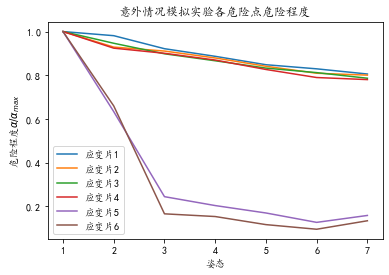

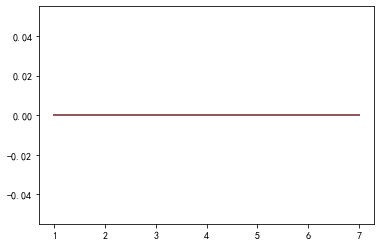

In [11]:
def w_gesture(data, gestures, sgs, forces):
    print(gestures.shape[0], sgs.shape[0])
    thetas = np.zeros([sgs.shape[0], gestures.shape[0]])
    bias = np.zeros([sgs.shape[0], gestures.shape[0]])
    for i, sg in enumerate(sgs):
        for j, g in enumerate(gestures):
            thetas[i, j] = l_gesture(data, g, sg, forces)
    
    print(thetas)
    for i, sg in enumerate(sgs):
        thetas_i = abs(thetas[i, :])
        plt.plot(gestures, thetas_i/np.max(thetas_i))
    plt.legend(sgs)
    str_legend = [str_sg.replace('sg', '应变片') for str_sg in sgs]
    plt.legend(str_legend)
    plt.title("意外情况模拟实验各危险点危险程度")
    plt.ylabel(r"危险程度$\alpha / \alpha_{max}$")
    plt.xlabel(r"姿态")
    plt.show()
    for i, sg in enumerate(sgs):
        bias_i = abs(bias[i, :])
        plt.plot(gestures, bias_i/np.max(thetas_i))
    plt.show()

w_gesture(data3, gestures, sgs ,forces)